## Importing Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
df = pd.read_csv("covid.csv")

In [3]:
df.head()

,Unnamed: 0,ObservationDate,Confirmed,Deaths,Recovered
0,01-01-2021,01/22/2020,84054370,1835216,47313005
1,01-02-2021,01/23/2020,84679917,1843620,47614297
2,01-03-2021,01/24/2020,85212884,1850931,47882779
3,01-04-2021,01/25/2020,85766126,1861107,48173187
4,01-05-2021,01/26/2020,86504791,1876406,48488548


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       403 non-null    object
 1   ObservationDate  403 non-null    object
 2   Confirmed        403 non-null    int64 
 3   Deaths           403 non-null    int64 
 4   Recovered        403 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.9+ KB


In [5]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       403 non-null    object        
 1   ObservationDate  403 non-null    datetime64[ns]
 2   Confirmed        403 non-null    int64         
 3   Deaths           403 non-null    int64         
 4   Recovered        403 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 15.9+ KB


In [7]:
df.set_index('ObservationDate', inplace=True)

In [8]:
df.head()

,Unnamed: 0,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-22,01-01-2021,84054370,1835216,47313005
2020-01-23,01-02-2021,84679917,1843620,47614297
2020-01-24,01-03-2021,85212884,1850931,47882779
2020-01-25,01-04-2021,85766126,1861107,48173187
2020-01-26,01-05-2021,86504791,1876406,48488548


In [9]:
df1 = df[["Confirmed", "Deaths", "Recovered"]]

In [10]:
df1.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,84054370,1835216,47313005
2020-01-23,84679917,1843620,47614297
2020-01-24,85212884,1850931,47882779
2020-01-25,85766126,1861107,48173187
2020-01-26,86504791,1876406,48488548


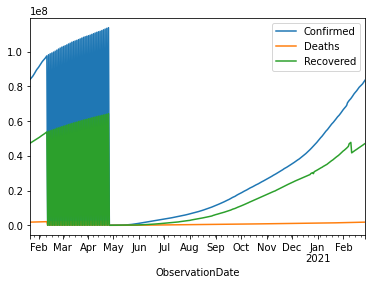

In [11]:
df1.plot()

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
res = adfuller(df1['Confirmed'])

In [14]:
res

(-1.4331317261533412,
 0.566293370628931,
 1,
 401,
 {'1%': -3.4467631030732506,
  '5%': -2.868774682311516,
  '10%': -2.570623877774392},
 13262.280095713599)

In [17]:
df1['Confirmed1'] = df1['Confirmed'] - df1['Confirmed'].shift(1)

<ipython-input-17-3db08c8d467d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Confirmed1'] = df1['Confirmed'] - df1['Confirmed'].shift(1)


In [19]:
df1.head()
df1.dropna()

,Confirmed,Deaths,Recovered,Confirmed1
ObservationDate,,,,
2020-01-23,84679917,1843620,47614297,625547.0
2020-01-24,85212884,1850931,47882779,532967.0
2020-01-25,85766126,1861107,48173187,553242.0
2020-01-26,86504791,1876406,48488548,738665.0
2020-01-27,87286422,1891399,48801673,781631.0
...,...,...,...,...
2021-02-23,80879838,1772241,45717710,437870.0
2021-02-24,81375961,1782022,46016136,496123.0
2021-02-25,82038435,1797397,46369231,662474.0


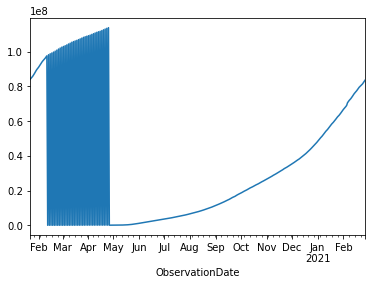

In [20]:
df1['Confirmed'].plot()

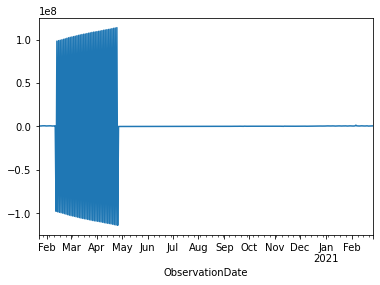

In [21]:
df1['Confirmed1'].plot()

In [22]:
res = adfuller(df1['Deaths'])
res[1]

0.506273033940543

In [23]:
df1['Deaths1'] = df1['Deaths'] - df1['Deaths'].shift(1)
df1.dropna()

,Confirmed,Deaths,Recovered,Confirmed1,Deaths1
ObservationDate,,,,,
2020-01-23,84679917,1843620,47614297,625547.0,8404.0
2020-01-24,85212884,1850931,47882779,532967.0,7311.0
2020-01-25,85766126,1861107,48173187,553242.0,10176.0
2020-01-26,86504791,1876406,48488548,738665.0,15299.0
2020-01-27,87286422,1891399,48801673,781631.0,14993.0
...,...,...,...,...,...
2021-02-23,80879838,1772241,45717710,437870.0,7394.0
2021-02-24,81375961,1782022,46016136,496123.0,9781.0
2021-02-25,82038435,1797397,46369231,662474.0,15375.0


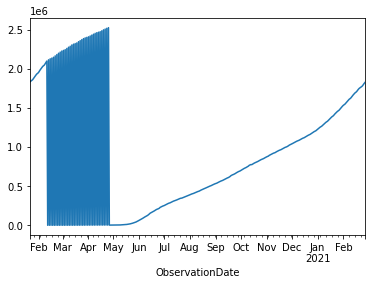

In [24]:
df1['Deaths'].plot()

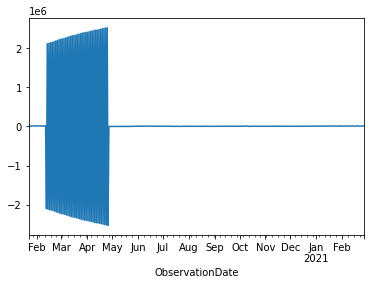

In [25]:
df1['Deaths1'].plot()

In [26]:
res = adfuller(df['Recovered'])
res[1]

0.6032472116647489

In [27]:
df1['Recovered1'] = df1['Recovered'] - df1['Recovered'].shift(1)
df1.dropna()

,Confirmed,Deaths,Recovered,Confirmed1,Deaths1,Recovered1
ObservationDate,,,,,,
2020-01-23,84679917,1843620,47614297,625547.0,8404.0,301292.0
2020-01-24,85212884,1850931,47882779,532967.0,7311.0,268482.0
2020-01-25,85766126,1861107,48173187,553242.0,10176.0,290408.0
2020-01-26,86504791,1876406,48488548,738665.0,15299.0,315361.0
2020-01-27,87286422,1891399,48801673,781631.0,14993.0,313125.0
...,...,...,...,...,...,...
2021-02-23,80879838,1772241,45717710,437870.0,7394.0,292388.0
2021-02-24,81375961,1782022,46016136,496123.0,9781.0,298426.0
2021-02-25,82038435,1797397,46369231,662474.0,15375.0,353095.0


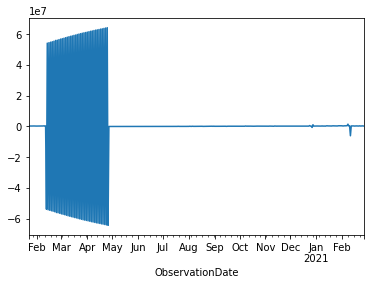

In [28]:
df1['Recovered1'].plot()

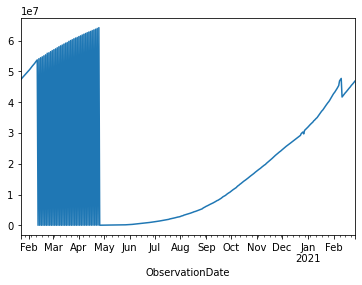

In [29]:
df1['Recovered'].plot()

## plotting correlation plots -acf, pacf

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

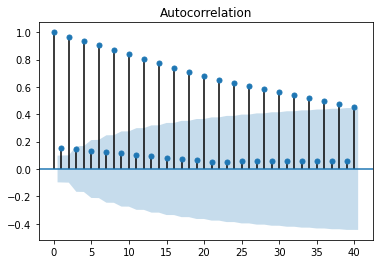

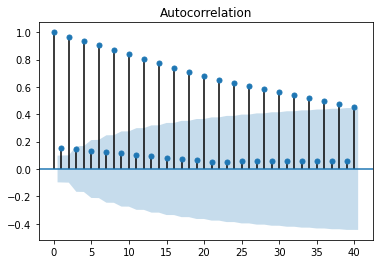

In [38]:
plot_acf(df1['Confirmed'], lags=40)

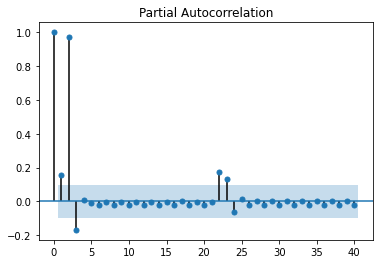

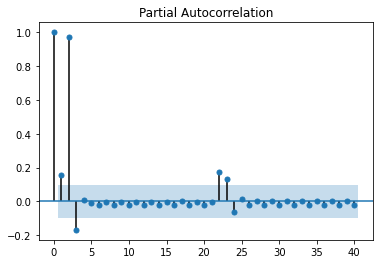

In [37]:
plot_pacf(df1['Confirmed'], lags=40)

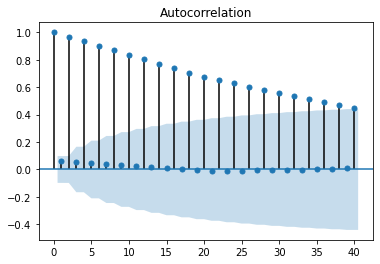

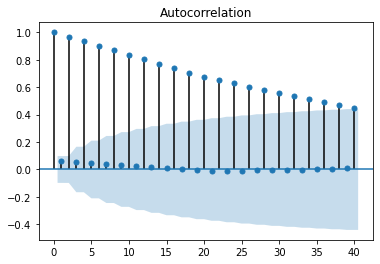

In [36]:
plot_acf(df1['Deaths'], lags=40)

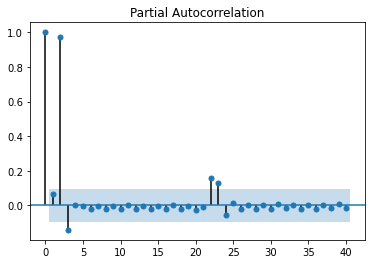

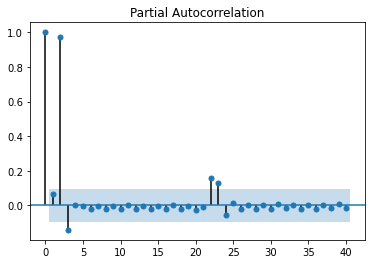

In [35]:
plot_pacf(df1['Deaths'], lags=40)

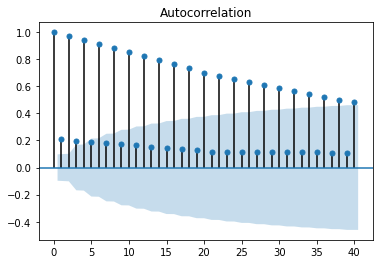

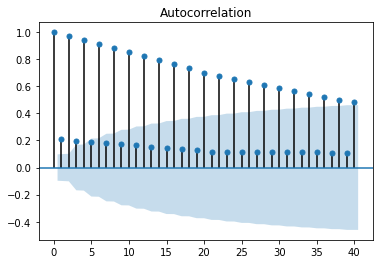

In [39]:
plot_acf(df['Recovered'], lags=40)

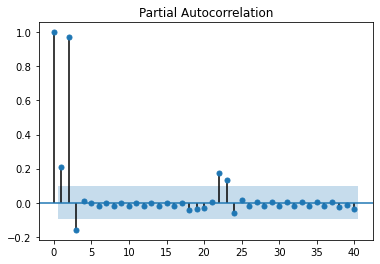

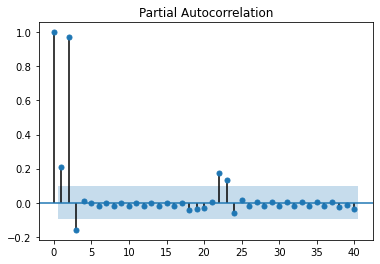

In [44]:
plot_pacf(df['Recovered'], lags=40)

## ARIMA Model

In [56]:
from statsmodels.tsa.arima.model import ARIMA as arima

## Train-Test Split

In [63]:
df1.shape

(403, 6)

In [68]:
y_train = df1[:320]

In [69]:
y_train.shape

(320, 6)

In [71]:
y_test = df1[320:]
y_test.shape

(83, 6)

In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 403 entries, 2020-01-22 to 2021-02-27
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Confirmed   403 non-null    int64  
 1   Deaths      403 non-null    int64  
 2   Recovered   403 non-null    int64  
 3   Confirmed1  402 non-null    float64
 4   Deaths1     402 non-null    float64
 5   Recovered1  402 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 22.0 KB


In [94]:
df1 = df1.dropna()
df1['Confirmed1'] = df1['Confirmed1'].astype(np.int64)
type(df1['Confirmed1'])

<ipython-input-94-1a01fac32fae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Confirmed1'] = df1['Confirmed1'].astype(np.int64)


pandas.core.series.Series

In [96]:
df1['Recovered1'] = df1['Recovered1'].astype(np.int64)

<ipython-input-96-9ae5f479c8cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Recovered1'] = df1['Recovered1'].astype(np.int64)


In [97]:
df1['Deaths1'] = df1['Deaths1'].astype(np.int64)

<ipython-input-97-7368264c29b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Deaths1'] = df1['Deaths1'].astype(np.int64)


In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 402 entries, 2020-01-23 to 2021-02-27
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Confirmed   402 non-null    int64
 1   Deaths      402 non-null    int64
 2   Recovered   402 non-null    int64
 3   Confirmed1  402 non-null    int64
 4   Deaths1     402 non-null    int64
 5   Recovered1  402 non-null    int64
dtypes: int64(6)
memory usage: 22.0 KB


## Model Training

In [99]:
from pmdarima import auto_arima

In [100]:
model_auto_confirmed = auto_arima(df1['Confirmed1'], trace=True, suppress_warnings=True)
model_auto_deaths = auto_arima(df1['Deaths1'], trace=True, suppress_warnings=True)
model_auto_recovered = auto_arima(df1['Recovered1'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=13879.502, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=15330.782, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=13873.375, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=15053.006, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=15328.782, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=13875.356, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=13875.371, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=13876.050, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=13871.375, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=13873.356, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=13873.371, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=15051.010, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=13874.050, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.617 seconds
Performin

In [157]:
model_confirmed = arima(y_train['Confirmed1'], order=(2,1,0))
res_confirmed = model_confirmed.fit()

C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [158]:
model_deaths = arima(y_train['Deaths1'], order=(5,1,0))
res_deaths = model_deaths.fit()

In [159]:
model_recovered = arima(y_train['Recovered1'], order=(5,1,0))
res_recovered = model_recovered.fit()

## Model Prediction

In [160]:
y_pred_confirmed = res_confirmed.predict()
y_pred_deaths = res_deaths.predict()
y_pred_recovered = res_recovered.predict()

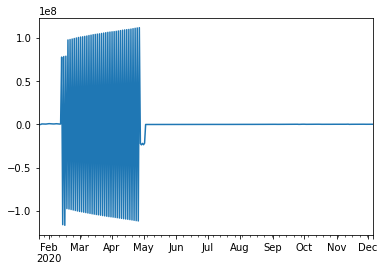

In [161]:
y_pred_confirmed.plot()

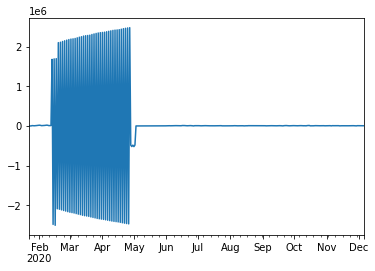

In [162]:
y_pred_deaths.plot()

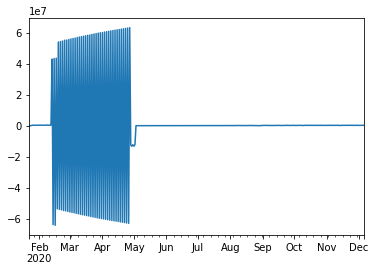

In [163]:
y_pred_recovered.plot()

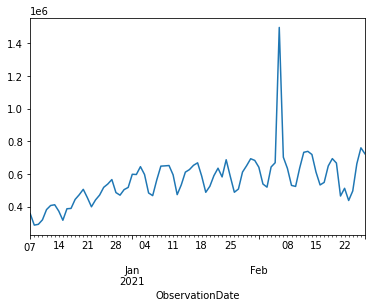

In [164]:
y_test['Confirmed1'].plot()

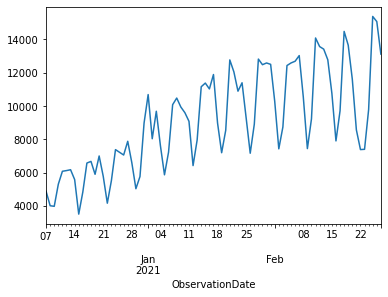

In [165]:
y_test['Deaths1'].plot()

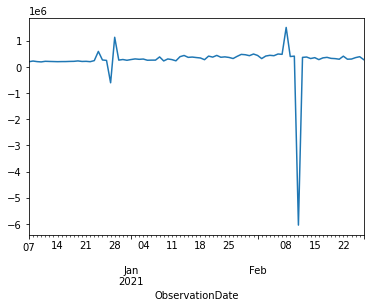

In [166]:
y_test['Recovered1'].plot()

## Model Evaluation

In [167]:
from sklearn.metrics import mean_squared_error as mse

265235.8321586525


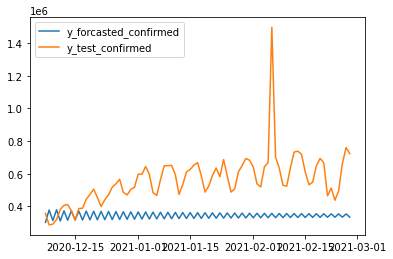

In [168]:
y_forecast_confirmed = res_confirmed.forecast(steps=83)
print(np.sqrt(mse(y_test['Confirmed1'], y_forecast_confirmed)))
plt.plot(y_forecast_confirmed)
plt.plot(y_test['Confirmed1'])
plt.legend(['y_forcasted_confirmed', 'y_test_confirmed'])
plt.show()

4270.189938064648


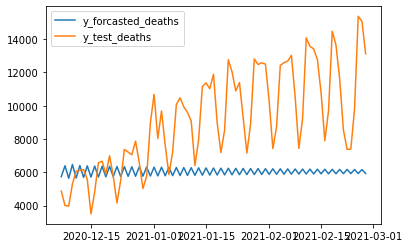

In [169]:
y_forecast_deaths = res_deaths.forecast(steps=83)
print(np.sqrt(mse(y_test['Deaths1'], y_forecast_deaths)))
plt.plot(y_forecast_deaths)
plt.plot(y_test['Deaths1'])
plt.legend(['y_forcasted_deaths', 'y_test_deaths'])
plt.show()

727840.5443710223


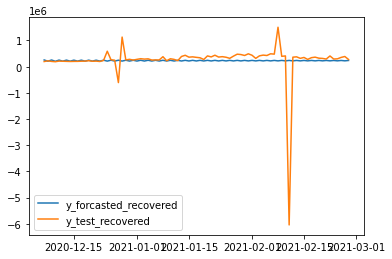

In [170]:
y_forecast_recovered = res_recovered.forecast(steps=83)
print(np.sqrt(mse(y_test['Recovered1'], y_forecast_recovered)))
plt.plot(y_forecast_recovered)
plt.plot(y_test['Recovered1'])
plt.legend(['y_forcasted_recovered', 'y_test_recovered'])
plt.show()